## Problem Description
In this problem we have two datasets with red and white type wines. Our task is to predict the quality of wine and we can extend it to find out type of wine too.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### Importing necessary modules

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading datasets

In [40]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

print("\n Red wine dataset:\n", red_wine.head())
print("\n\n White wine dataset: \n", white_wine.head())


 Red wine dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  

In [41]:
# Dimenion of datasets
print("The red wine data set has ", red_wine.shape[0], " rows and ", red_wine.shape[1], "columns.")
print("\nThe white wine data set has ", white_wine.shape[0], " rows and ", white_wine.shape[1], "columns.")

The red wine data set has  1599  rows and  12 columns.

The white wine data set has  4898  rows and  12 columns.


### Exploratory Data Analysis

In [42]:
# getting info about datatypes of columns in both datasets
print(red_wine.info())
print(white_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null fl

In [43]:
# lets print out the columns in both data set which are the charecteristics of wine
print("The red wine has following charectistics: \n", red_wine.columns)
print("\nThe white wine has following charecteristics: \n ", white_wine.columns)

The red wine has following charectistics: 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

The white wine has following charecteristics: 
  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


From the above information we confirmed that there is no misssing values present in both of the datasets. Both data has 12 columns while in red wine dataset 1599 rows and 4898 rows in white wine.  But we need to show in a nice format that we dont have missing values.

In [44]:
# Printing out the missing values
s1 = red_wine.isnull().sum()
s2 = white_wine.isnull().sum()

df = pd.concat([s1,s2], axis=1)
df.columns=['Red Wine', 'White Wine']
df

,Red Wine,White Wine
fixed acidity,0,0
volatile acidity,0,0
citric acid,0,0
residual sugar,0,0
chlorides,0,0
free sulfur dioxide,0,0
total sulfur dioxide,0,0
density,0,0
pH,0,0
sulphates,0,0


So It is clearly shows that there is no missing values in both of the dataframe.when we work with the data together we need an extra column to indentify which wine type each observation is and for ease of use we can label the quality as low, medium, high.

In [45]:
# lets broadcast an extra column for wine type in both of the datasets
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [46]:
# now lets check both of our data set wine type column
print(red_wine['wine_type'].head())
print(white_wine['wine_type'].head())

0    red
1    red
2    red
3    red
4    red
Name: wine_type, dtype: object
0    white
1    white
2    white
3    white
4    white
Name: wine_type, dtype: object


In [47]:
# lets add both dataframes together
wine = pd.concat([red_wine, white_wine])
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9.8        5   

In [48]:
# let's add a category of wine quality according to the quality score
wine['quality_label'] = wine['quality'].apply(lambda x: 'bad' if x <= 5 
                                             else 'good')
wine['quality_label'] = pd.Categorical(wine['quality_label'], categories=['bad', 'good'])
print(wine[['quality','quality_label']].head())

   quality quality_label
0        5           bad
1        5           bad
2        5           bad
3        6          good
4        5           bad


As we concatenate both the data so the white dataset just appended to red wine dataset, and this will create problem while training and testing. To avoid this problem we will bootstrap a random sample to shuffle the data set.

In [49]:
wine = wine.sample(frac=1, random_state=42).reset_index(drop=True)
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   

   alcohol  quality wine_type quality_label  
0     12.2        8     white          g

In [50]:
# descriptive statistics 
print(red_wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [51]:
print(white_wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

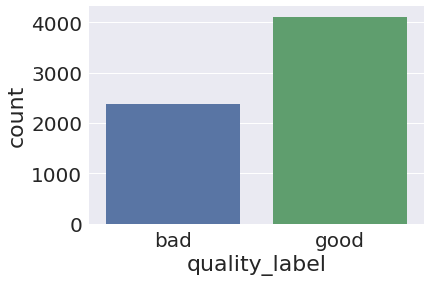

In [52]:
# let's plot on wine quality label to see the count of data points on each category
sns.countplot(x='quality_label', data=wine)

In [53]:
# counts on each wine_quality group
print(wine['quality_label'].value_counts())

good    4113
bad     2384
Name: quality_label, dtype: int64


The above result shows that our sampling of quality_label may encounter a class imbalance. And we have to keep an eye on this while training a model. Either we will use resampling methods or we will measure on different measures other than accuracy to get a fair idea about the classification.

In [54]:
# let's group the data according to the quality label and see the stats
grouped_wine = wine.groupby(['quality_label', 'wine_type'])
print(grouped_wine.describe())

                        alcohol                                              \
                          count       mean       std  min   25%   50%   75%   
quality_label wine_type                                                       
bad           red         744.0   9.926478  0.758007  8.4   9.4   9.7  10.3   
              white      1640.0   9.849530  0.876269  8.0   9.2   9.6  10.4   
good          red         855.0  10.855029  1.106109  8.4  10.0  10.8  11.7   
              white      3258.0  10.848880  1.247434  8.5   9.8  10.8  11.9   

                              chlorides            ...   total sulfur dioxide  \
                          max     count      mean  ...                    75%   
quality_label wine_type                            ...                          
bad           red        14.9     744.0  0.092989  ...                   78.0   
              white      13.6    1640.0  0.051436  ...                  182.0   
good          red        14.0     855.0  

The above stats give a fair information about the wine type and quality together

The above pairplot doesn't give any information, so we will try to viualize in a better way.

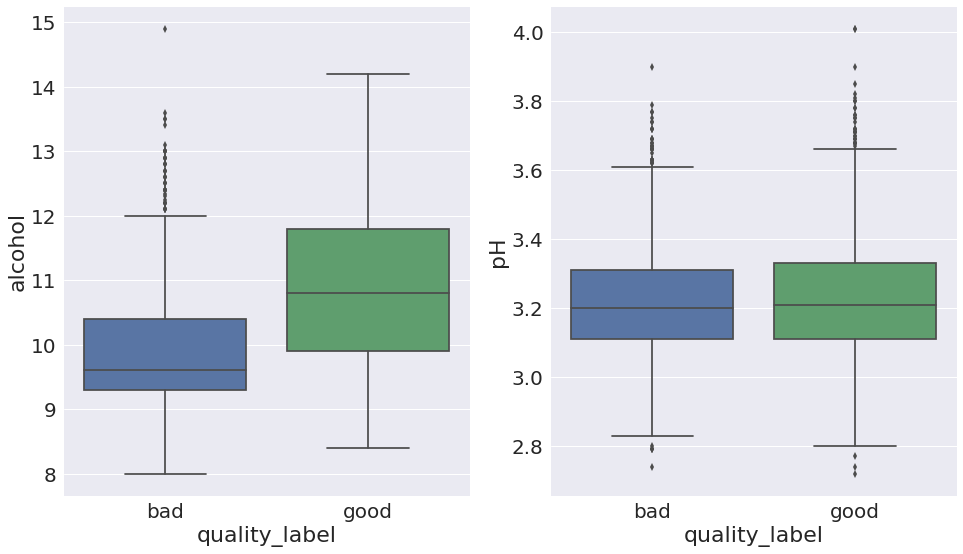

In [55]:
# let's start with each indiviudal feature and comapare the effect
# lets plot with ph and alcohol % 
plt.figure(figsize=(16,9))
ax1 = plt.subplot(1,2,1)
sns.boxplot(x='quality_label', y='alcohol', data=wine, ax=ax1)
ax1.set_xlabel('quality_label')
ax1.set_ylabel('alcohol')
ax2 = plt.subplot(1,2,2)
sns.boxplot(x='quality_label', y='pH', data=wine,ax=ax2)
ax2.set_xlabel('quality_label')
ax2.set_ylabel('pH')

plt.show()

the above box plot clearly shows that the pH median of three wine quality varies similarly, while in alochol content plot the median for low and average has similar while in great it varies significantly. One more thing to take care is the outliers in both plots, in both of the plots there are number of outliers in average quality. but we need to verify wether the outliers need to keep or discard.

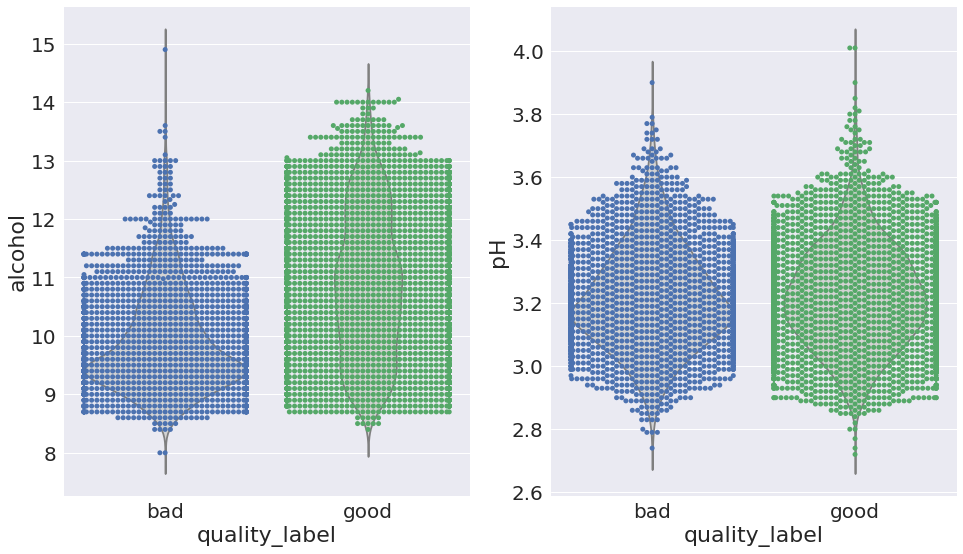

In [56]:
# let's start with each indiviudal feature and comapare the effect
# lets plot with ph and alcohol % 
plt.figure(figsize=(16,9))
ax1 = plt.subplot(1,2,1)
sns.violinplot(x='quality_label', y='alcohol', data=wine, inner=None, color='lightgray',ax=ax1)
sns.swarmplot(x='quality_label', y='alcohol', data=wine)
ax1.set_xlabel('quality_label')
ax1.set_ylabel('alcohol')
ax2 = plt.subplot(1,2,2)
sns.violinplot(x='quality_label', y='pH', data=wine,inner=None, color='lightgray',ax=ax2)
sns.swarmplot(x='quality_label', y='pH', data=wine)
ax2.set_xlabel('quality_label')
ax2.set_ylabel('pH')

plt.show()

The above plot tell us that average and great quality wines have much more spread data points than low.

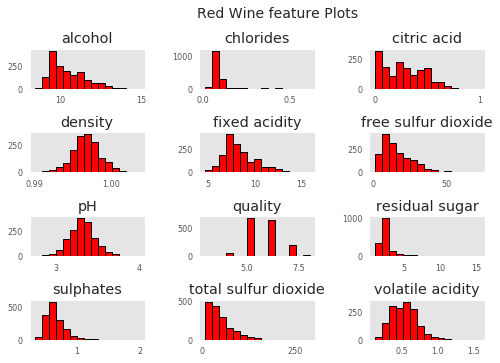

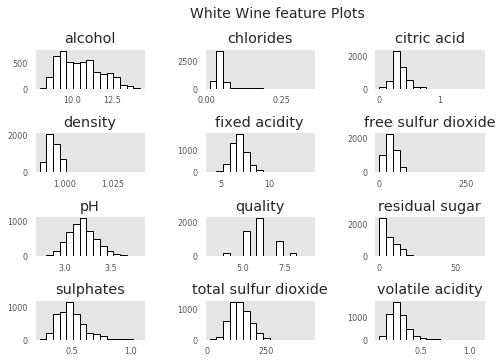

In [57]:
plt.style.use('ggplot')
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
rt = plt.suptitle('Red Wine feature Plots', x=0.65, y=1.25, fontsize=14)  

white_wine.hist(bins=15, color='white', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
wt = plt.suptitle('White Wine feature Plots', x=0.65, y=1.25, fontsize=14)

Before we saw the distribution and stats of alcohol and pH for a wine quality. But is the alochol and pH affects the wine quality.Let's see that

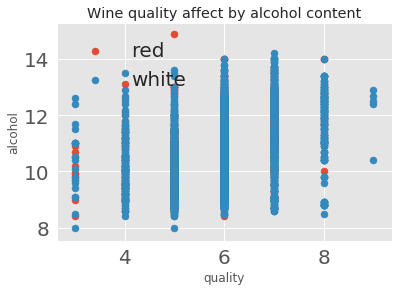

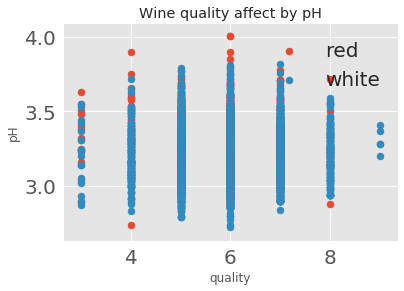

In [58]:
def feature_affect_plot(data, datax, datay, title):
    for name, group  in data.groupby('wine_type'):
        plt.scatter(group[datax], group[datay], label=name)
    plt.title(title)
    plt.xlabel(datax)
    plt.ylabel(datay)
    plt.legend()
    plt.show()
    
feature_affect_plot(wine, "quality", "alcohol", "Wine quality affect by alcohol content" )
feature_affect_plot(wine, "quality", "pH", "Wine quality affect by pH")

The scatter plot clearly gives evident that alcohol content and pH affects the quality of wine. As we can see from lower quality wine to higher quality wine alcohol content differs so was pH. But how thse affects we need to answer this.

Before moving to find out the correlation lets see some more features that are possible cause of wine quality.

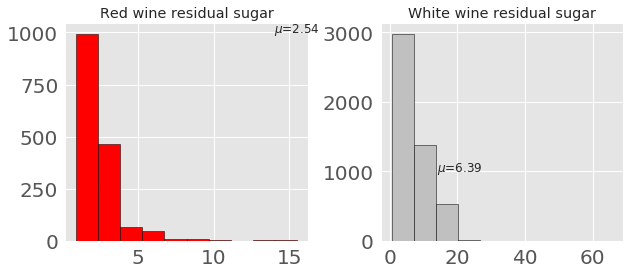

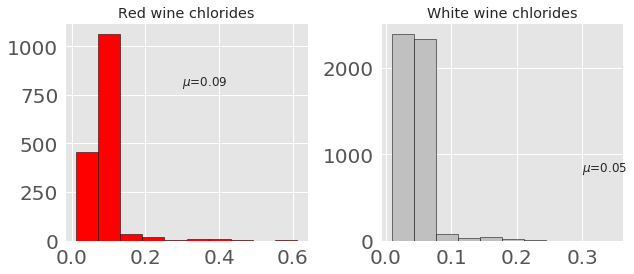

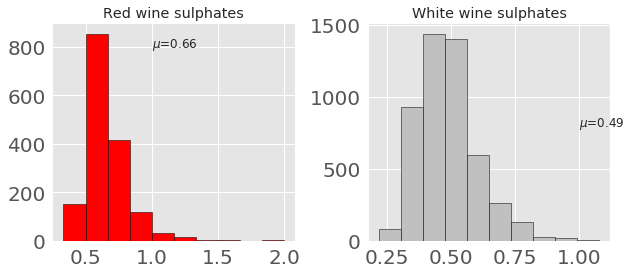

In [59]:
# let's see the residual sugar content for wines
def dist_plot(x, xcord, ycord):
    fig, ax = plt.subplots(1,2, figsize=(10,4))

    red_wine.hist(column=x, ax=ax[0], color='red', edgecolor='k')
    white_wine.hist(column=x, ax=ax[1], color='silver', edgecolor='k')
    ax[0].text(xcord, ycord, r'$\mu$='+str(round(red_wine[x].mean(),2)),
         fontsize=12)
    ax[1].text(xcord, ycord, r'$\mu$='+str(round(white_wine[x].mean(),2)),
         fontsize=12)
    ax[0].set_title('Red wine ' + x)
    ax[1].set_title('White wine '+ x)
    plt.show()
dist_plot('residual sugar', 14, 1000)
dist_plot('chlorides', 0.3, 800)
dist_plot('sulphates', 1.0, 800)

The summary of the above 3 plots is, residual sugar is more in white wine than red wine. while chloride and sulphate content seems to be same in both wines.
Now let's discover the correlation among variables

### Correlation plot

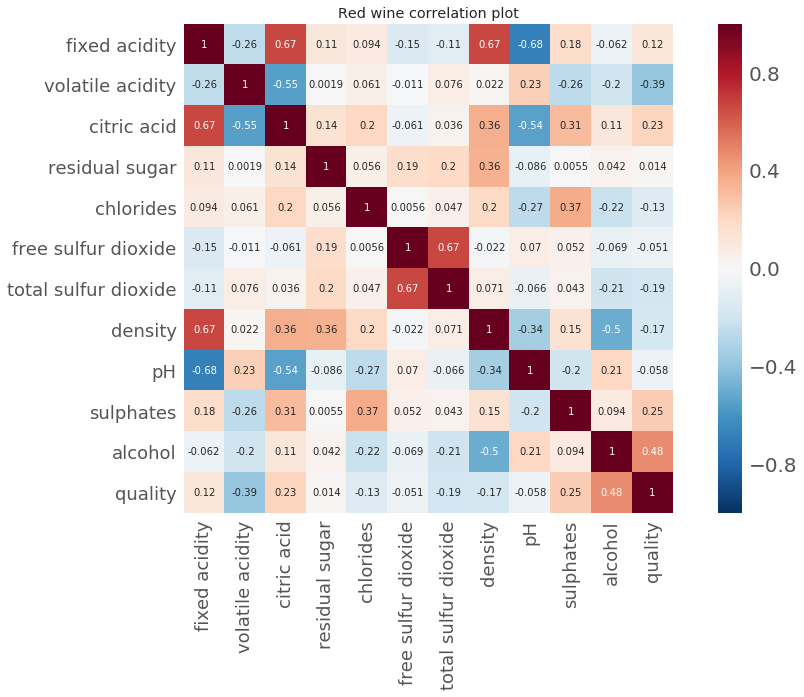

In [60]:
def correlation_plot(data, title):
    plt.figure(figsize=(16, 9))
    
    ax = sns.heatmap(data.corr(), square=True, cmap='RdBu_r', vmin=-1, vmax=1, annot=True)
    ax.set_xticklabels(labels = round(data.corr(),2).index, fontsize = 18)
    ax.set_yticklabels(labels = round(data.corr(),2).index, fontsize = 18)
    ax.set_title(title)
    plt.show()
correlation_plot(red_wine, "Red wine correlation plot")

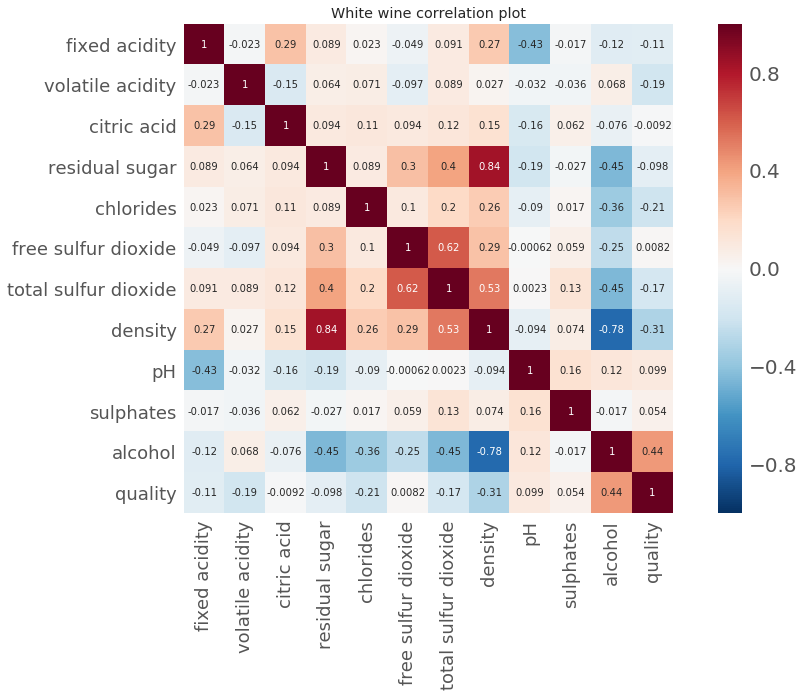

In [61]:
correlation_plot(white_wine, "White wine correlation plot")

### Conclusions from the heat map correlation plot

* Red Wine Correlation Analysis
    * Highly positive correlations:
        * Fixed acidity and citric acid
        * Fixed acidity and density
        * free sulpher dioxide and total sulpher dioxide

    * Highly negative correlations:
        * Fixed acidity and pH
        
* White wine correlation Analysis
    * Highly positive correlations
        * Residual Sugar and density
        
    * Highly negative correlations 
        * density and alcohol

### Outlier Detection
Let's draw box plots to see the outliers.

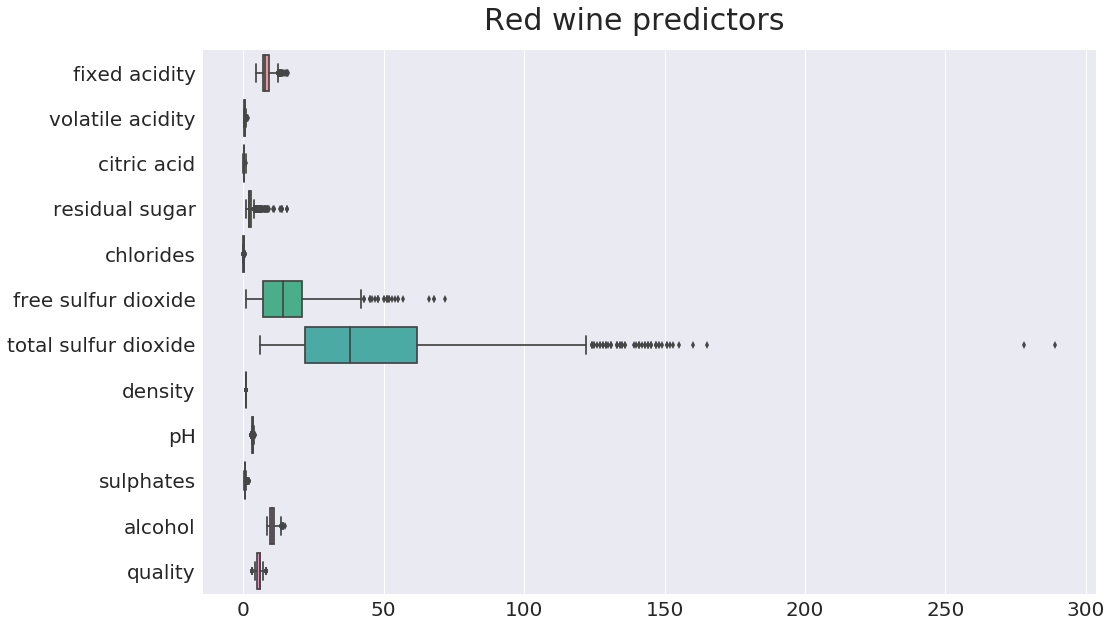

In [62]:
def box_plot(data, title = "Box plot for outlier"):
    # Make the figure object
    plt.figure(figsize=(16, 10))
    # Add title
    plt.suptitle(title, y = 0.94, fontsize = 30)
    # Scale the font size
    sns.set(font_scale = 2)
    # Create the boxplot
    sns.boxplot(data = data, orient='h')
    
box_plot(data = red_wine, title = "Red wine predictors")

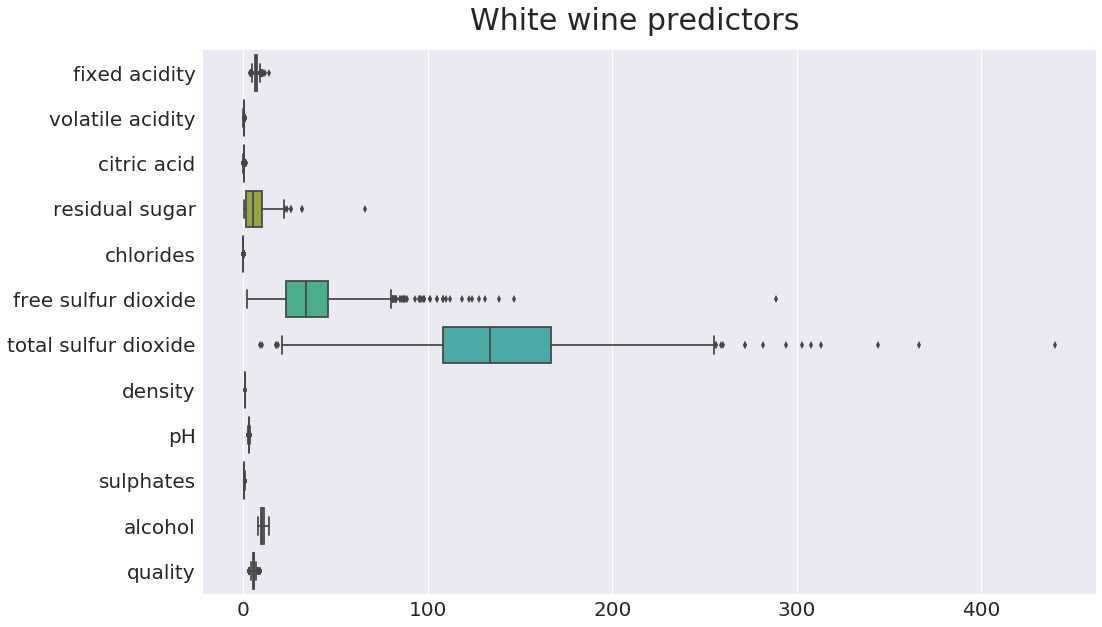

In [63]:
box_plot(white_wine, title="White wine predictors")

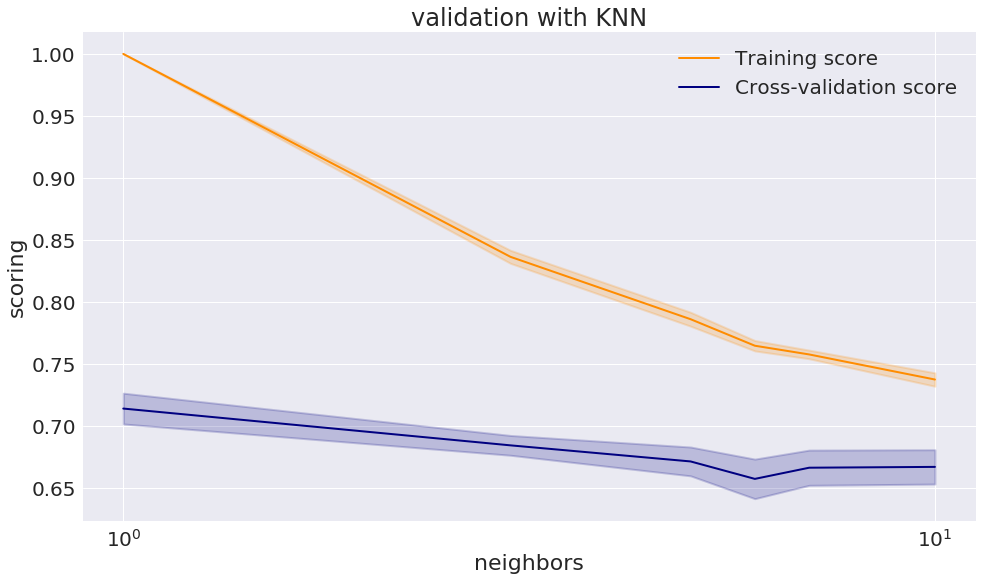

{'knn__n_neighbors': 1}
0.777435897436
             precision    recall  f1-score   support

        bad       0.70      0.70      0.70       718
       good       0.82      0.82      0.82      1232

avg / total       0.78      0.78      0.78      1950



In [107]:
wine_features = wine.iloc[:, :-3]
wine_quality_label = np.array(wine['quality_label'])
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_label, test_label = train_test_split(wine_features, wine_quality_label, test_size=0.3, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

parameters = {'knn__n_neighbors' : [1, 3, 5, 6, 7, 10]}
cv = GridSearchCV(knn_pipe, param_grid=parameters, cv=3)
cv.fit(train_feature, train_label)
label_pred = cv.predict(test_feature)

def plot_validation(clf, X, y, param_range, param_name,title,xlab, ylab):
    # param_range = parameters['knn__n_neighbors']
    train_scores, test_scores = validation_curve(
        clf, X, y, param_name=param_name, param_range=param_range, cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(16, 9))
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    # plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
plot_validation(KNeighborsClassifier(), train_feature, train_label, parameters['knn__n_neighbors'], "n_neighbors", "validation with KNN", "neighbors", "scoring")    
print(cv.best_params_)
print(cv.score(test_feature, test_label))
print(classification_report(test_label, label_pred))

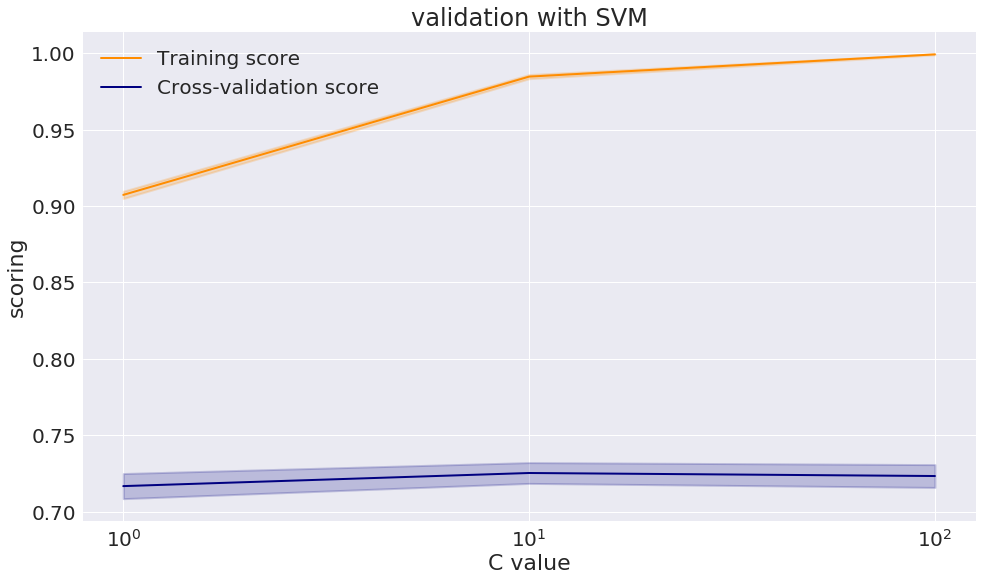




 {'svc__C': 10, 'svc__gamma': 0.1}
0.787692307692
             precision    recall  f1-score   support

        bad       0.73      0.67      0.70       718
       good       0.82      0.85      0.84      1232

avg / total       0.79      0.79      0.79      1950



In [108]:
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

parameters = {'svc__C' : [1, 10, 100],
             'svc__gamma':[0.1, 0.001]}
cv = GridSearchCV(svm_pipe, param_grid=parameters, cv=5)
cv.fit(train_feature, train_label)
label_pred = cv.predict(test_feature)

plot_validation(SVC(), train_feature, train_label, parameters['svc__C'], "C", "validation with SVM", "C value", "scoring")    


print("\n\n\n", cv.best_params_)
print(cv.score(test_feature, test_label))
print(classification_report(test_label, label_pred))